# Seaborn vs Matplotlib

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

In [2]:
x = np.linspace(-1, +1, 100)
y = np.sin(2*np.pi*x)

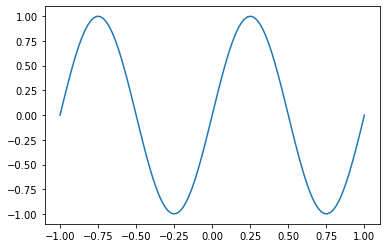

In [3]:
plt.plot(x, y)

In [4]:
sns.set()

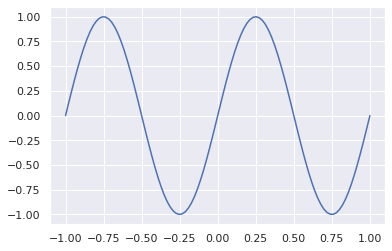

In [5]:
plt.plot(x, y)

# Seaborn vs Pandas

In [6]:
data = pd.read_csv('https://raw.githubusercontent.com/alissonSCA/dataset/master/PoliceDeathsInAmerica.csv')

In [7]:
data.head()

,index,person,dept,eow,cause,cause_short,date,year,canine,dept_name,state
0,0,Constable Darius Quimby,"Albany County Constable's Office, NY","EOW: Monday, January 3, 1791",Cause of Death: Gunfire,Gunfire,1791-01-03,1791,False,Albany County Constable's Office,NY
1,1,Sheriff Cornelius Hogeboom,"Columbia County Sheriff's Office, NY","EOW: Saturday, October 22, 1791",Cause of Death: Gunfire,Gunfire,1791-10-22,1791,False,Columbia County Sheriff's Office,NY
2,2,Deputy Sheriff Isaac Smith,"Westchester County Sheriff's Department, NY","EOW: Thursday, May 17, 1792",Cause of Death: Gunfire,Gunfire,1792-05-17,1792,False,Westchester County Sheriff's Department,NY
3,3,Marshal Robert Forsyth,United States Department of Justice - United S...,"EOW: Saturday, January 11, 1794",Cause of Death: Gunfire,Gunfire,1794-01-11,1794,False,United States Department of Justice - United S...,US
4,4,Sheriff Robert Maxwell,"Greenville County Sheriff's Office, SC","EOW: Sunday, November 12, 1797",Cause of Death: Gunfire,Gunfire,1797-11-12,1797,False,Greenville County Sheriff's Office,SC


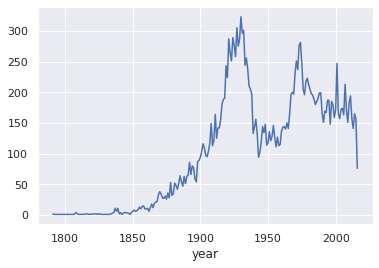

In [11]:
dt2 = data.groupby('year')['index'].count()

sns.lineplot(x= dt2.index, y=dt2.values)

In [14]:
dt = {'ano': [], 'gFire': [], '#mortes':[]}

gFire = data['cause_short'] == 'Gunfire'

dt2 = data.loc[gFire, :].groupby('year')['index'].count()
dt['ano'].extend(dt2.index)
dt['#mortes'].extend(dt2.values)
dt['gFire'].extend( ['S' for i in np.arange(dt2.values.size)] )

dt2 = data.loc[~gFire, :].groupby('year')['index'].count()
dt['ano'].extend(dt2.index)
dt['#mortes'].extend(dt2.values)
dt['gFire'].extend( ['N' for i in np.arange(dt2.values.size)] )

dt = pd.DataFrame(dt)



In [15]:
dt.head()

,ano,gFire,#mortes
0,1791,S,2
1,1792,S,1
2,1794,S,1
3,1797,S,1
4,1804,S,1


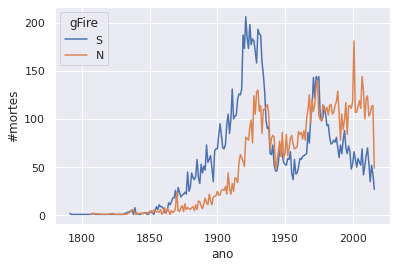

In [16]:
sns.lineplot(data=dt, x='ano', y='#mortes', hue='gFire')

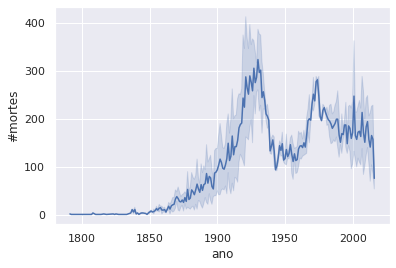

In [17]:
sns.lineplot(data=dt, x='ano', y='#mortes', estimator=np.sum)

# Intervalo de confiança

* fonte dos dados: https://www.kaggle.com/datasets/paradisejoy/top-hits-spotify-from-20002019

In [18]:
data = pd.read_csv('https://raw.githubusercontent.com/alissonSCA/dataset/master/songs_normalize.csv')

In [19]:
data.head()

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,Britney Spears,Oops!...I Did It Again,211160,False,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop
1,blink-182,All The Small Things,167066,False,1999,79,0.434,0.897,0,-4.918,1,0.0488,0.0103,0.000000,0.6120,0.684,148.726,"rock, pop"
2,Faith Hill,Breathe,250546,False,1999,66,0.529,0.496,7,-9.007,1,0.0290,0.1730,0.000000,0.2510,0.278,136.859,"pop, country"
3,Bon Jovi,It's My Life,224493,False,2000,78,0.551,0.913,0,-4.063,0,0.0466,0.0263,0.000013,0.3470,0.544,119.992,"rock, metal"
4,*NSYNC,Bye Bye Bye,200560,False,2000,65,0.614,0.928,8,-4.806,0,0.0516,0.0408,0.001040,0.0845,0.879,172.656,pop


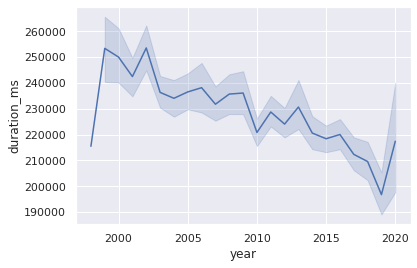

In [21]:
sns.lineplot(data=data, x='year', y='duration_ms', estimator=np.mean)

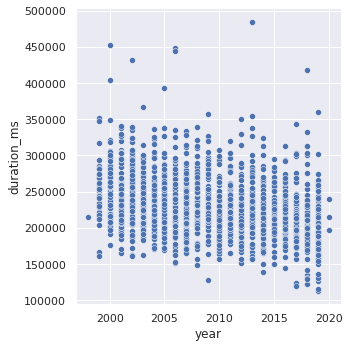

In [22]:
sns.relplot(data=data, x='year', y='duration_ms')

# Bootstrapping

* fonte: https://youtu.be/CMRVEKf9jWA?list=PLtPIclEQf-3cG31dxSMZ8KTcDG7zYng1j